1) 순환 신경망(Recurrent Neural Network, RNN)

RNN(Recurrent Neural Network)은 입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델입니다. 번역기를 생각해보면 입력은 번역하고자 하는 단어의 시퀀스인 문장입니다. 출력에 해당되는 번역된 문장 또한 단어의 시퀀스입니다. 이와 같이 시퀀스들을 처리하기 위해 고안된 모델들을 시퀀스 모델이라고 합니다. 그 중 RNN은 가장 기본적인 인공 신경망 시퀀스 모델입니다.

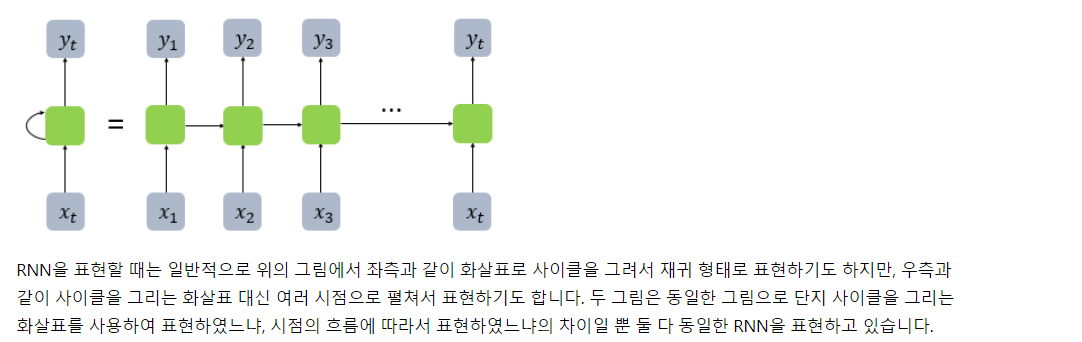
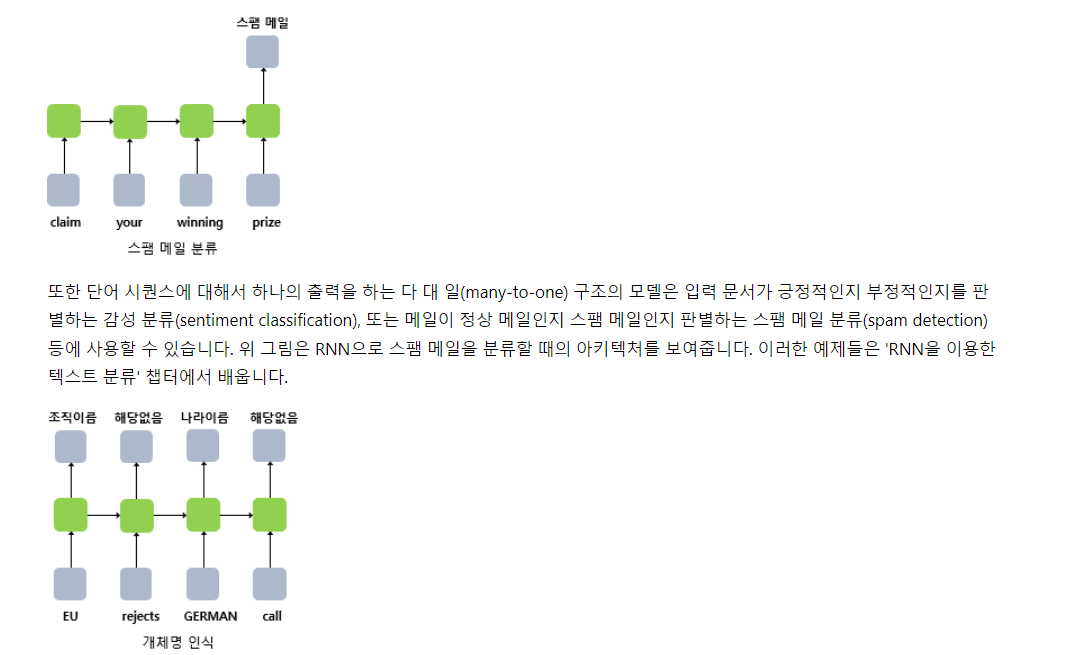
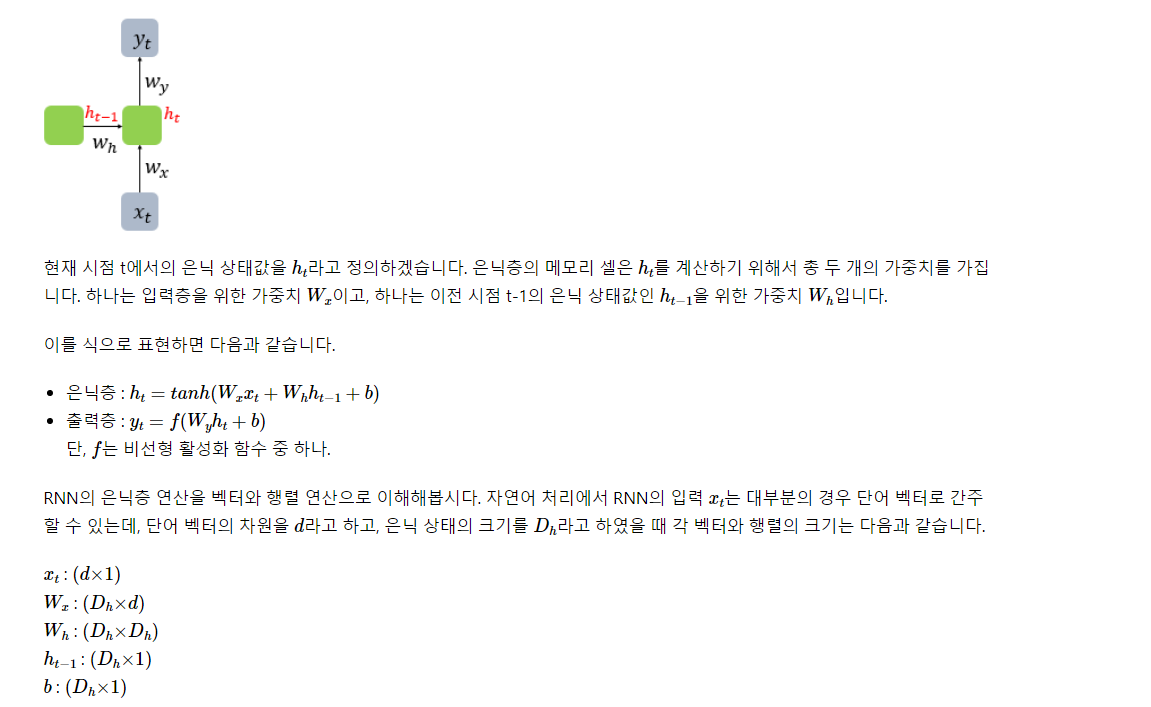
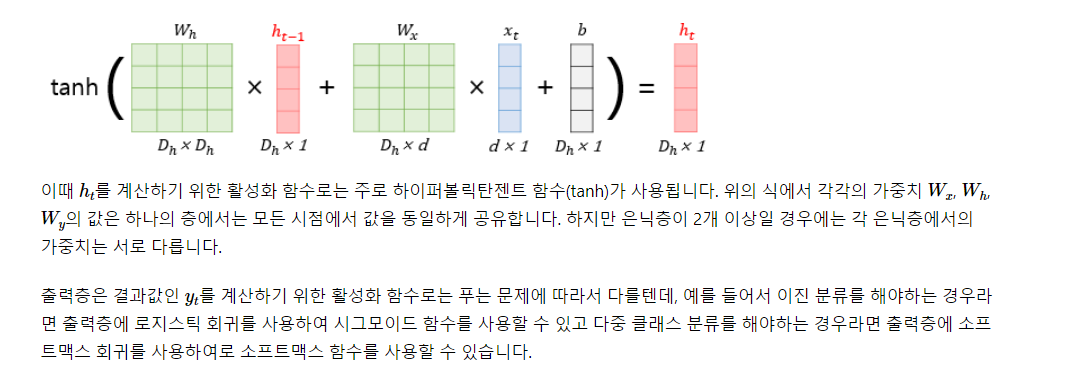

In [ ]:
from tensorflow.keras.layers import SimpleRNN
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))

hidden_units = 은닉 상태의 크기를 정의. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다.

timesteps = 입력 시퀀스의 길이(input_length)라고 표현하기도 함. 시점의 수.(단어 개수)

input_dim = 입력의 크기.(단어의 차원)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

8. 순환신경망
8-1. 순환신경망(RNN)

8-1-2. 케라스(Keras)로 RNN 구현하기
from tensorflow.keras.layers import SimpleRNN
model.add(SimpleRNN(hidden_units))


8-1-4. 깊은 순환 신경망(Deep Recurrent Neural Network)
다수의 은닉층을 가질 수 있다(은닉층을 2개)
model = Sequential()
model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))

8-1-5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)
시점 t에서의 출력값을 예측할 때 이전 시점의 입력뿐만 아니라, 이후 시점의 입력 또한 예측에 기여

운동을 열심히 하는 것은 [        ]을 늘리는데 효과적이다.
1) 근육
2) 지방
3) 스트레스

깊은(deep) 양방향 순환 신경망
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))



## 8-4. 케라스의 SimpleRNN과 LSTM 이해하기

### SimpleRNN

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [2]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


위 입력은 단어 벡터의 차원은 5이고, 문장의 길이가 4인 경우를 가정한 입력입니다. 다시 말해 4번의 시점(timesteps)이 존재하고, 각 시점마다 5차원의 단어 벡터가 입력으로 사용됩니다. 그런데 앞서 RNN은 2D 텐서가 아니라 3D 텐서를 입력을 받는다고 언급한 바 있습니다. 즉, 위에서 만든 2D 텐서를 3D 텐서로 변경합니다. 이는 배치 크기 1을 추가해주므로서 해결합니다.

In [3]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


(batch_size, timesteps, input_dim)에 해당되는 (1, 4, 5)의 크기를 가지는 3D 텐서가 생성되었습니다. batch_size는 한 번에 RNN이 학습하는 데이터의 양을 의미하지만, 여기서는 샘플이 1개 밖에 없으므로 batch_size는 1입니다.

In [4]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)
print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.8705341  0.9782003  0.920774 ]], shape: (1, 3)


(1, 3) 크기의 텐서가 출력되는데, 이는 마지막 시점의 은닉 상태입니다. 은닉 상태의 크기를 3으로 지정했음을 주목합시다. 기본적으로 return_sequences가 False인 경우에는 SimpleRNN은 마지막 시점의 은닉 상태만 출력합니다. 이번에는 return_sequences를 True로 지정하여 모든 시점의 은닉 상태를 출력해봅시다.

In [5]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.9355618   0.82145435 -0.7457423 ]
  [-0.9736448   0.60060996  0.34685624]
  [-0.8240686  -0.20024006 -0.96244526]
  [-0.9986959   0.90469503  0.12703395]]], shape: (1, 4, 3)


(1, 4, 3) 크기의 텐서가 출력됩니다. 앞서 입력 데이터는 (1, 4, 5)의 크기를 가지는 3D 텐서였고, 그 중 4가 시점(timesteps)에 해당하는 값이므로 모든 시점에 대해서 은닉 상태의 값을 출력하여 (1, 4, 3) 크기의 텐서를 출력하는 것입니다.



### LSTM 이해하기

실제로 SimpleRNN이 사용되는 경우는 거의 없습니다. 이보다는 LSTM이나 GRU을 주로 사용하는데, 이번에는 임의의 입력에 대해서 LSTM을 사용할 경우를 보겠습니다. 우선 return_sequences를 False로 두고, return_state가 True인 경우를 봅시다.




In [6]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape)) # 은닉층 전체/마지막
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape)) # 은닉층 마지막
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape)) # 결과

hidden state : [[ 0.00073461  0.3415838  -0.1531875 ]], shape: (1, 3)
last hidden state : [[ 0.00073461  0.3415838  -0.1531875 ]], shape: (1, 3)
last cell state : [[ 8.1869960e-04  1.4781313e+00 -9.6226662e-01]], shape: (1, 3)


이번에는 SimpleRNN 때와는 달리, 세 개의 결과를 반환합니다. return_sequences가 False이므로 우선 첫번째 결과는 마지막 시점의 은닉 상태입니다. 그런데 LSTM이 SimpleRNN과 다른 점은 return_state를 True로 둔 경우에는 마지막 시점의 은닉 상태뿐만 아니라 셀 상태까지 반환한다는 점입니다. 이번에는 return_sequences를 True로 바꿔보겠습니다.



In [7]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[ 0.04549257  0.02766928 -0.09924593]
  [ 0.14116384  0.06342091 -0.15428011]
  [ 0.3497421   0.19123441 -0.07614341]
  [ 0.48363215  0.1660514  -0.13158728]]], shape: (1, 4, 3)
last hidden state : [[ 0.48363215  0.1660514  -0.13158728]], shape: (1, 3)
last cell state : [[ 0.5877327  0.5536969 -0.2168105]], shape: (1, 3)


return_state가 True이므로 두번째 출력값이 마지막 은닉 상태, 세번째 출력값이 마지막 셀 상태인 것은 변함없지만 return_sequences가 True이므로 첫번째 출력값은 모든 시점의 은닉 상태가 출력됩니다.



### Bidirectional(LSTM) 이해하기

In [8]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [9]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [10]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


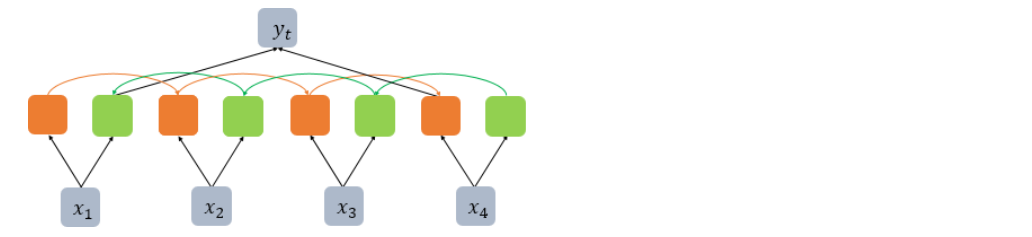

- 정방향 LSTM의 마지막 시점의 은닉 상태값 : [0.6303139 0.6303139 0.6303139]
- 역방향 LSTM의 첫번째 시점의 은닉 상태값 : [0.70387346 0.70387346 0.70387346]

In [11]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [12]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


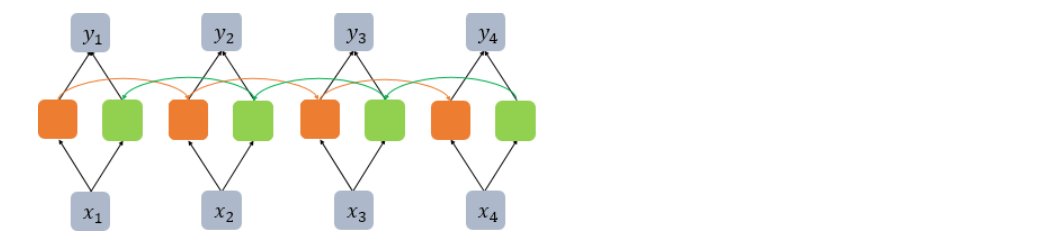

## 8-5. RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)

예를 들어 훈련 코퍼스에 위와 같은 문장이 있다고 해봅시다. 언어 모델은 주어진 단어 시퀀스로부터 다음 단어를 예측하는 모델입니다. 아래의 그림은 RNNLM이 어떻게 이전 시점의 단어들과 현재 시점의 단어로 다음 단어를 예측하는지를 보여줍니다.


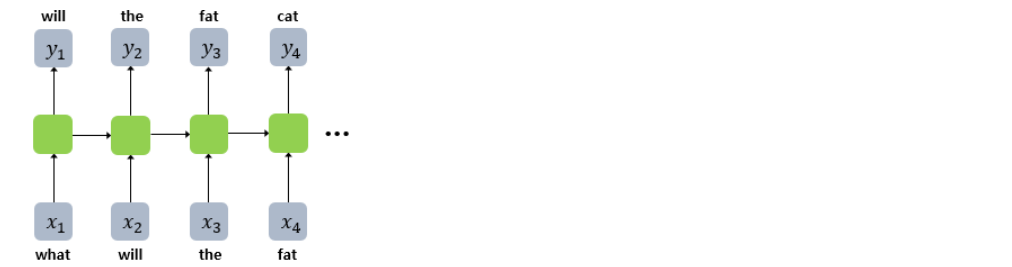

RNNLM은 기본적으로 예측 과정에서 이전 시점의 출력을 현재 시점의 입력으로 합니다. RNNLM은 what을 입력받으면, will을 예측하고 이 will은 다음 시점의 입력이 되어 the를 예측합니다. 결과적으로 네번째 시점의 cat은 앞서 나온 what, will, the, fat이라는 시퀀스로 인해 결정된 단어입니다.

사실 위 과정은 훈련이 끝난 모델의 테스트 과정 동안(실제 사용할 때)의 이야기입니다. 훈련 과정에서는 이전 시점의 예측 결과를 다음 시점의 입력으로 넣으면서 예측하는 것이 아니라, what will the fat cat sit on라는 훈련 샘플이 있다면, what will the fat cat sit 시퀀스를 모델의 입력으로 넣으면, will the fat cat sit on를 예측하도록 훈련됩니다. will, the, fat, cat, sit, on는 각 시점의 레이블입니다.


이러한 RNN 훈련 기법을 교사 강요(teacher forcing)라고 합니다. 교사 강요(teacher forcing)란, 테스트 과정에서 t 시점의 출력이 t+1 시점의 입력으로 사용되는 RNN 모델을 훈련시킬 때 사용하는 훈련 기법입니다. 훈련할 때 교사 강요를 사용할 경우, 모델이 t 시점에서 예측한 값을 t+1 시점에 입력으로 사용하지 않고, t 시점의 레이블. 즉, 실제 알고있는 정답을 t+1 시점의 입력으로 사용합니다.

물론, 훈련 과정에서도 이전 시점의 출력을 다음 시점의 입력으로 사용하면서 훈련 시킬 수도 있지만 이는 한 번 잘못 예측하면 뒤에서의 예측까지 영향을 미쳐 훈련 시간이 느려지게 되므로 교사 강요를 사용하여 RNN을 좀 더 빠르고 효과적으로 훈련시킬 수 있습니다.

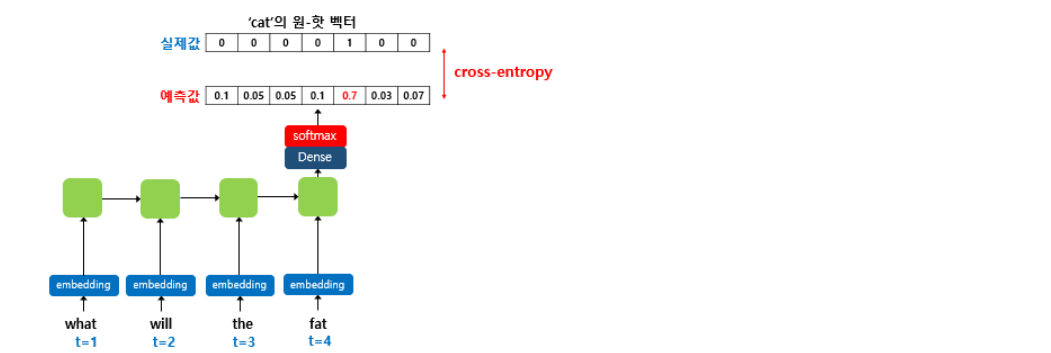




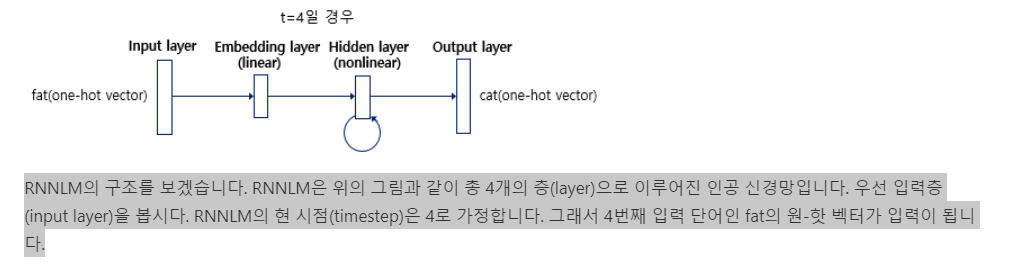
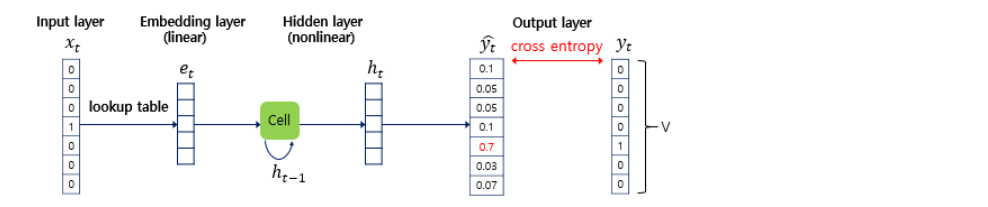

## 8-6. RNN을 이용한 텍스트 생성(Text Generation using RNN)

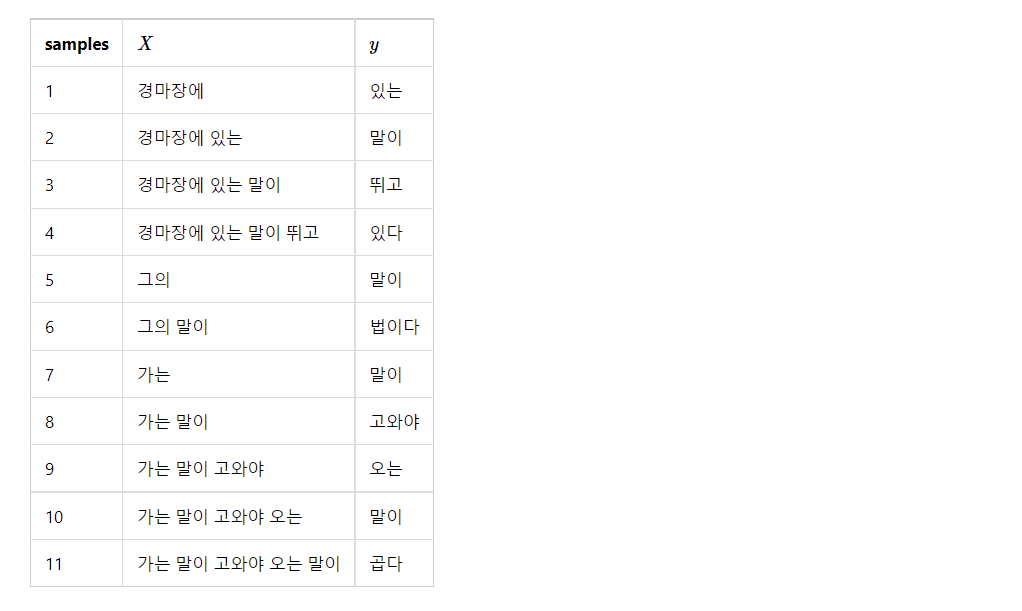


In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1 # 패딩을 위한 0을 고려하여 +1을 해줍니다
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [15]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [16]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [17]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [18]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


전체 훈련 데이터에서 가장 긴 샘플의 길이가 6임을 확인하였습니다. 전체 샘플의 길이를 6으로 패딩합니다.



In [19]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [20]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [21]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


레이블이 분리되었습니다. RNN 모델에 훈련 데이터를 훈련 시키기 전에 레이블에 대해서 원-핫 인코딩을 수행합니다.



In [22]:
y = to_categorical(y, num_classes=vocab_size)
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

하이퍼파라미터인 임베딩 벡터의 차원은 10, 은닉 상태의 크기는 32입니다. 다 대 일 구조의 RNN을 사용합니다. 

In [24]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.4761 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 2.4630 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4500 - accuracy: 0.0909 - 3ms/epoch - 3ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4368 - accuracy: 0.2727 - 3ms/epoch - 3ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4234 - accuracy: 0.2727 - 3ms/epoch - 3ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4097 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 7/200
1/1 - 0s - loss: 2.3955 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3809 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3656 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3496 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3329 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3154 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 13/200
1/1 - 0s - loss: 2.2970 - accuracy: 0.3636

In [25]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [26]:
print(sentence_generation(model, tokenizer, '경마장에', 4))
print(sentence_generation(model, tokenizer, '그의', 2))
print(sentence_generation(model, tokenizer, '가는', 5))

경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다


이 모델은 충분한 훈련 데이터를 갖고 있지 못하므로 위에서 문장의 길이에 맞게 적절하게 예측해야하는 횟수 4, 2, 5를 각각 인자값으로 주었습니다. 이 이상의 숫자를 주면 기계는 '있다', '법이다', '곱다' 다음에 나오는 단어가 무엇인지 배운 적이 없으므로 임의 예측을 합니다